<a href="https://colab.research.google.com/github/Sujeet2003/Feature-Engineering/blob/main/Olympics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/olympics_dataset.csv")

In [3]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [4]:
df.shape

(252565, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [6]:
df.describe()

,player_id,Year
count,2.525650e+05,252565.000000
mean,2.305499e+05,1981.743908
std,4.289330e+05,32.596548
min,0.000000e+00,1896.000000
25%,5.713700e+04,1960.000000
50%,1.356110e+05,1988.000000
75%,2.118590e+05,2008.000000
max,9.460001e+06,2024.000000


In [7]:
df.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

# Gender's Distribution

Sex
M    178544
F     74021
Name: count, dtype: int64


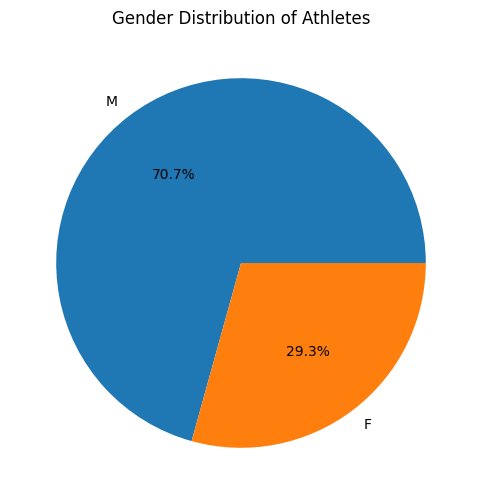

In [8]:
gender_counts = df['Sex'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Athletes')
plt.ylabel('')
plt.show()


## Gender Distribution over years

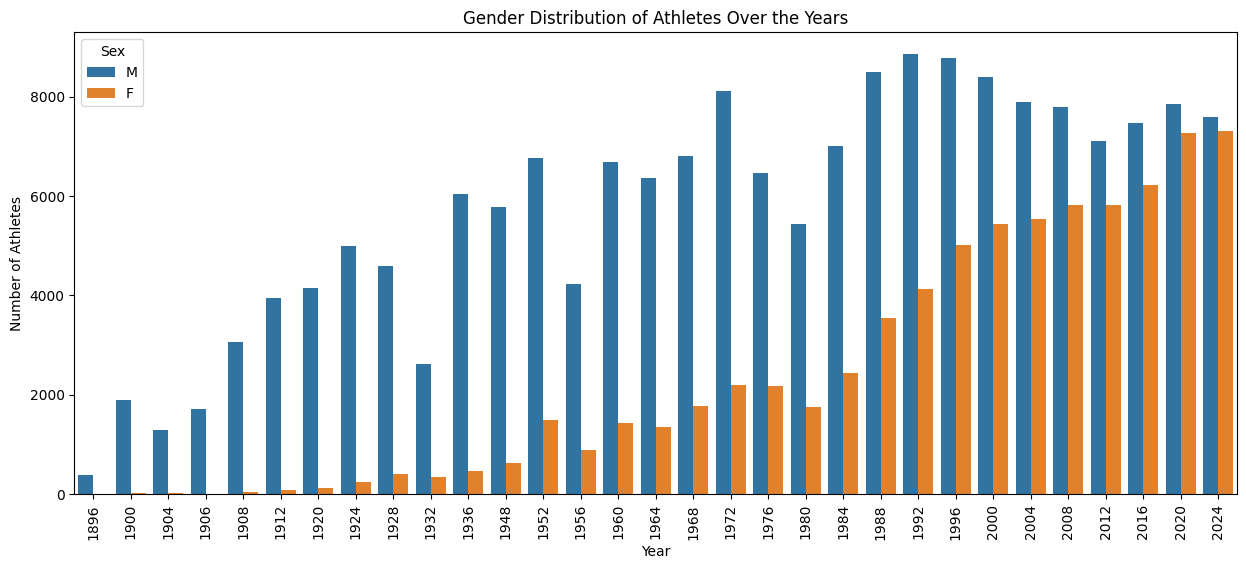

In [9]:
gender_distribution = df.groupby(['Year', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(15, 6))
sns.barplot(data=gender_distribution, x='Year', y='Count', hue='Sex')
plt.title('Gender Distribution of Athletes Over the Years')
plt.xticks(rotation=90)
plt.ylabel('Number of Athletes')
plt.show()

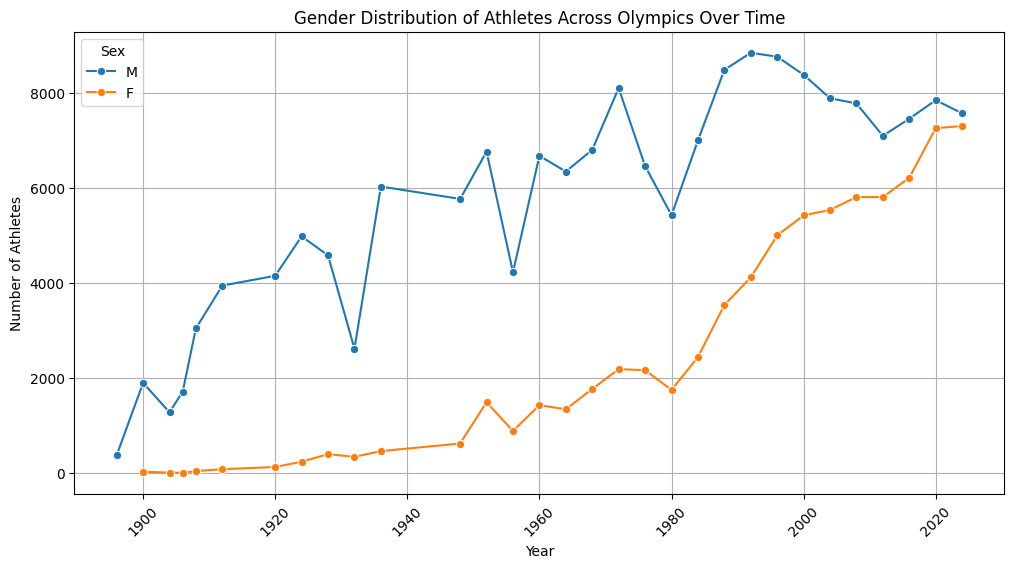

In [10]:
gender_distribution = df.groupby(['Year', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='Sex', data=gender_distribution, marker='o')

plt.xticks(rotation=45)
plt.title('Gender Distribution of Athletes Across Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

## Top 10 country with the most female participants

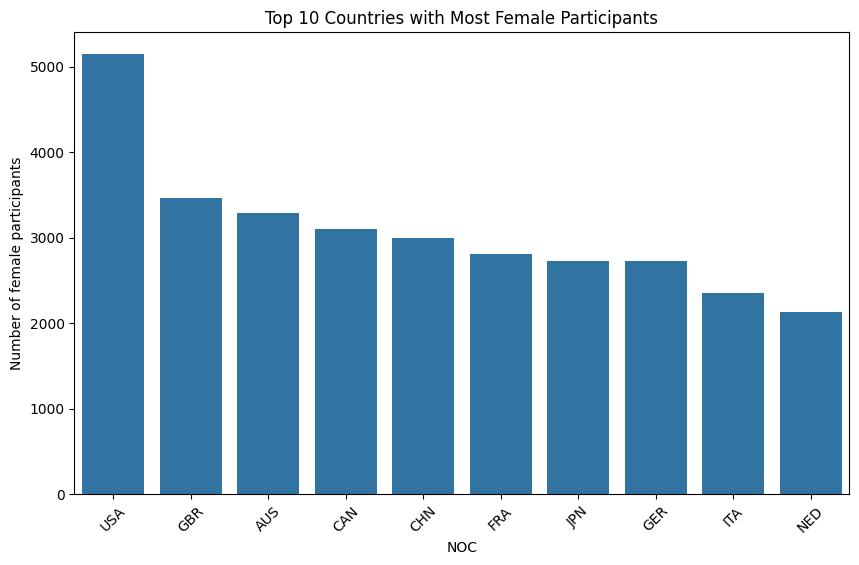

In [11]:
female_participants = df[df['Sex'] == 'F'].groupby('NOC')['Sex'].count().reset_index(name='Count')
top_countries_female = female_participants.sort_values('Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries_female, x='NOC', y='Count')
plt.title('Top 10 Countries with Most Female Participants')
plt.ylabel("Number of female participants")
plt.xticks(rotation=45)
plt.show()


## Number of male and female medalists over time

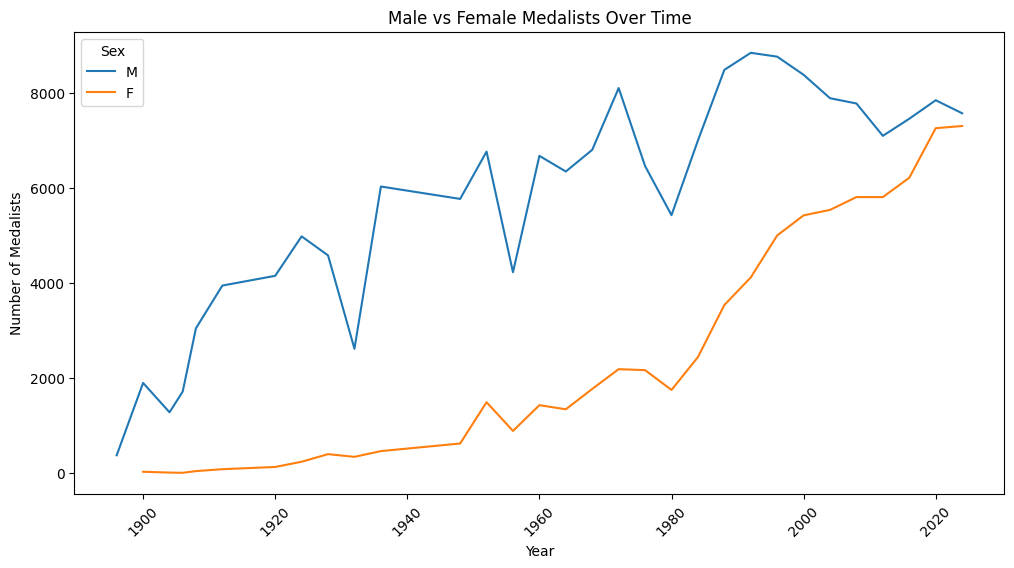

In [12]:
medalists_by_gender = df[df['Medal'] != 'NA'].groupby(['Year', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=medalists_by_gender, x='Year', y='Count', hue='Sex')
plt.title('Male vs Female Medalists Over Time')
plt.ylabel('Number of Medalists')
plt.xticks(rotation=45)
plt.show()


## Medal distribution

Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64


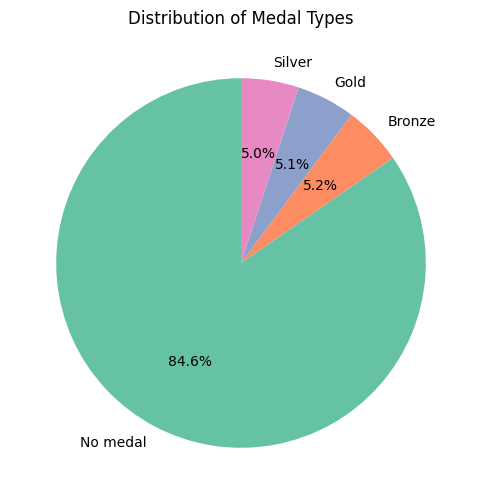

In [13]:
medal_distribution = df['Medal'].value_counts()
print(medal_distribution)

plt.figure(figsize=(8, 6))
plt.pie(medal_distribution.values, labels=medal_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

plt.title('Distribution of Medal Types')

plt.show()


## Top 10 athletes who has won more medals

In [14]:
medal_winners = df[df['Medal'] != 'No medal']

athlete_medals = medal_winners.groupby(['Name', 'Medal']).size().unstack(fill_value=0)

athlete_medals['Total Medals'] = athlete_medals.sum(axis=1)

top_athletes = athlete_medals.sort_values('Total Medals', ascending=False).head(10)

top_athletes

Medal,Bronze,Gold,Silver,Total Medals
Name,,,,
Michael Ii,2,23,3,28
Larysa (diriy-),4,9,5,18
Charles Jr.,2,10,4,16
Nikolay Andrianov,3,7,5,15
Borys Shakhlin,2,7,4,13
John Jr.,3,9,1,13
Takashi Ono,4,5,4,13
Gustaf Carlberg,1,5,7,13
Edoardo Mangiarotti,2,6,5,13


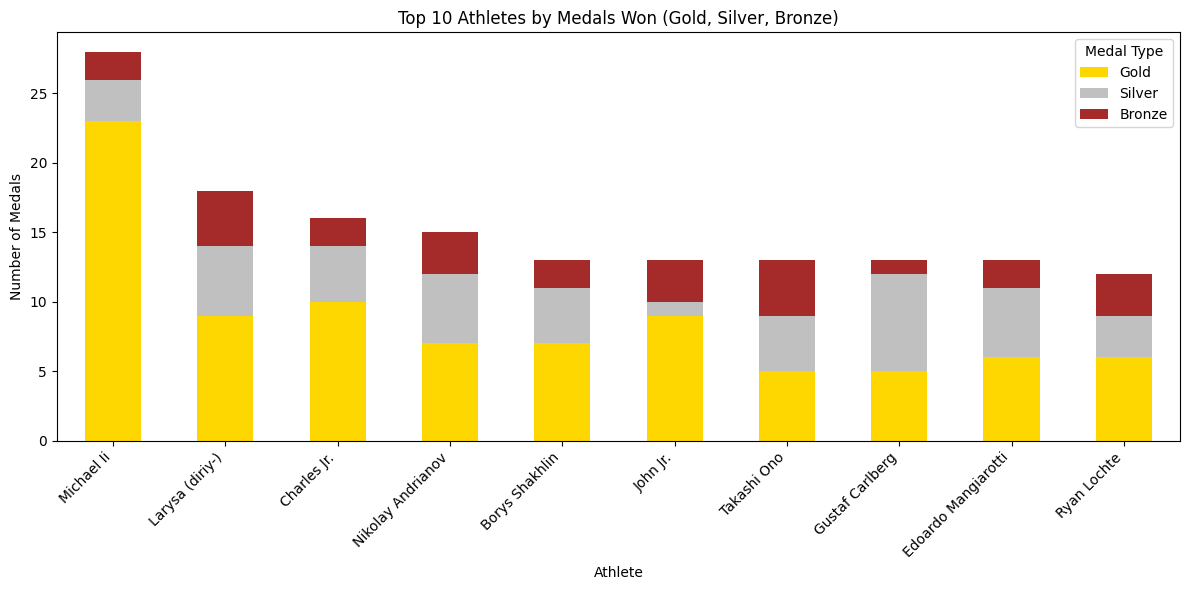

In [15]:
# Plotting the top athletes and their medals
top_athletes_plot = top_athletes[['Gold', 'Silver', 'Bronze']]

top_athletes_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gold', 'silver', 'brown'])

plt.title('Top 10 Athletes by Medals Won (Gold, Silver, Bronze)')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

## 10 athletes who has participated in number of unique events

In [16]:
athlete_events = df.groupby('Name')['Event'].nunique().reset_index()

# Renaming the column
athlete_events.columns = ['Name', 'Event Count']

top_athletes_by_events = athlete_events.sort_values(by='Event Count', ascending=False).head(10)

top_athletes_by_events

,Name,Event Count
58708,John Jr.,45
50530,Ioannis Theofilakis,33
123819,William Jr.,30
4674,Alexandros Theofilakis,28
51636,Ivan Ivanov,26
60216,Jos Garca,25
43070,Gustaf Carlberg,25
19550,Charles Jr.,25
60230,Jos Gonzlez,25
53214,James Jr.,22


<ipython-input-17-dce85ade767f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Event Count', y='Name', data=top_athletes_by_events, palette='viridis')


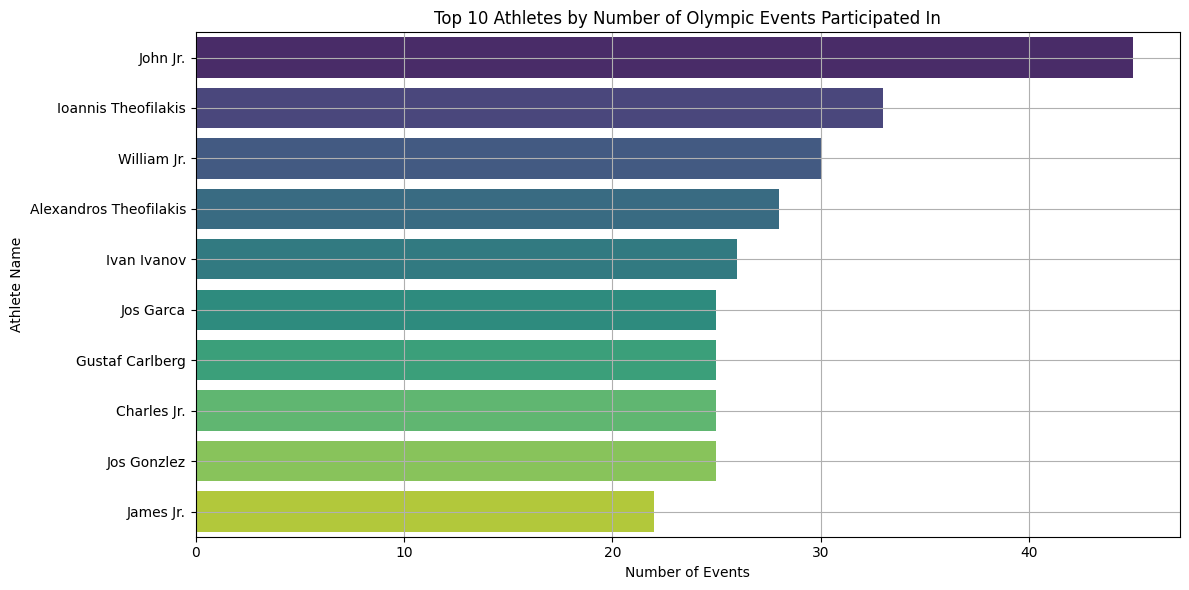

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Event Count', y='Name', data=top_athletes_by_events, palette='viridis')

plt.title('Top 10 Athletes by Number of Olympic Events Participated In')
plt.xlabel('Number of Events')
plt.ylabel('Athlete Name')
plt.grid(True)
plt.tight_layout()
plt.show()


## 5 Teams having more medals

In [18]:
medal_counts = df[df['Medal'] != 'No medal'].groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

medal_counts['Total'] = medal_counts.sum(axis=1)

top_teams = medal_counts['Total'].nlargest(5)

top_teams_medals = medal_counts.loc[top_teams.index]
top_teams_medals

Medal,Bronze,Gold,Silver,Total
NOC,,,,
USA,1366,2716,1539,5621
GBR,753,716,813,2282
URS,596,832,635,2063
GER,721,634,613,1968
FRA,660,583,712,1955


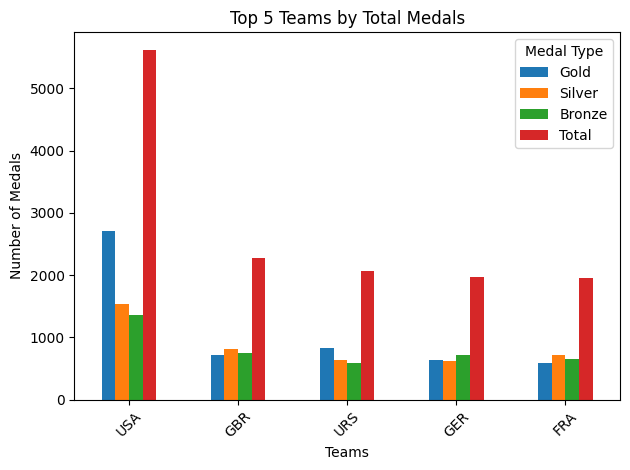

In [19]:
top_teams_medals = top_teams_medals[['Gold', 'Silver', 'Bronze', 'Total']]

top_teams_medals.plot(kind='bar')

plt.title('Top 5 Teams by Total Medals')
plt.xlabel('Teams')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()


## Top 10 cities who has `hosted olympics` more number of times

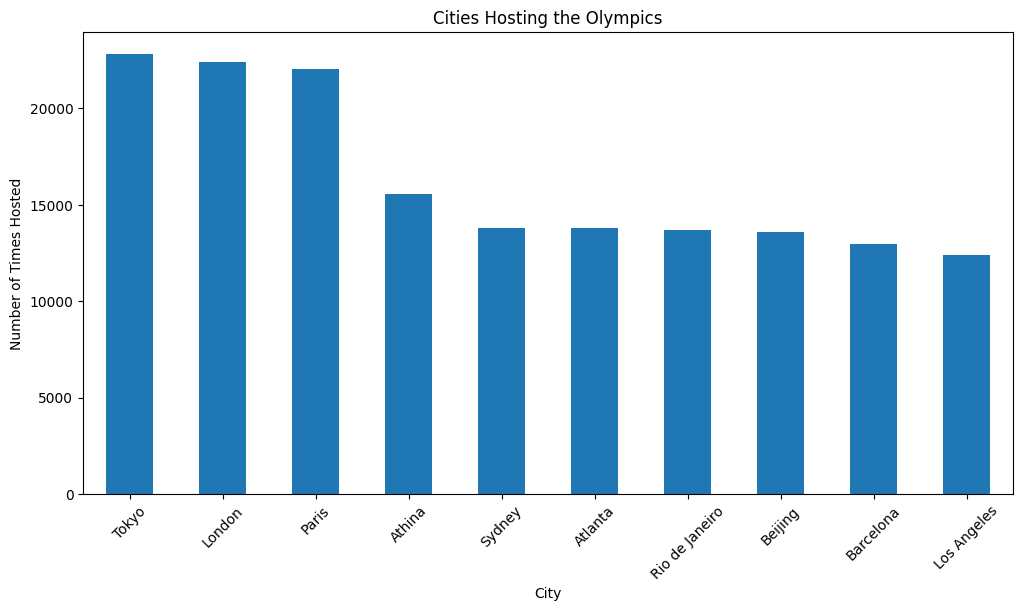

In [20]:
cities = df['City'].value_counts()
cities = cities.head(10)
cities.plot(kind='bar', figsize=(12, 6))
plt.title('Cities Hosting the Olympics')
plt.ylabel('Number of Times Hosted')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


## Relation between `number of players` vs `number of medals`

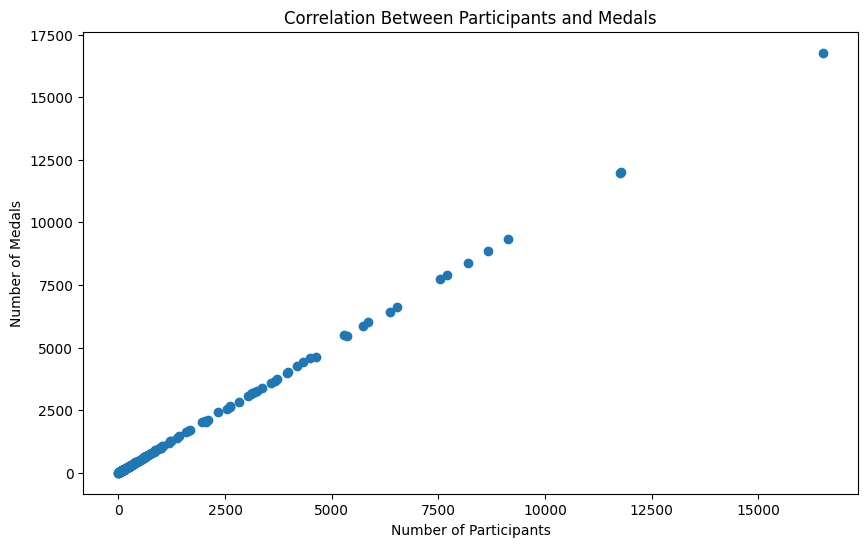

In [21]:
participant_counts = df.groupby('NOC')['player_id'].nunique()
medal_counts = df.groupby('NOC')['Medal'].count()

plt.figure(figsize=(10, 6))
plt.scatter(participant_counts, medal_counts)

plt.title('Correlation Between Participants and Medals')
plt.xlabel('Number of Participants')
plt.ylabel('Number of Medals')
plt.show()


## number of participants change over time according to season

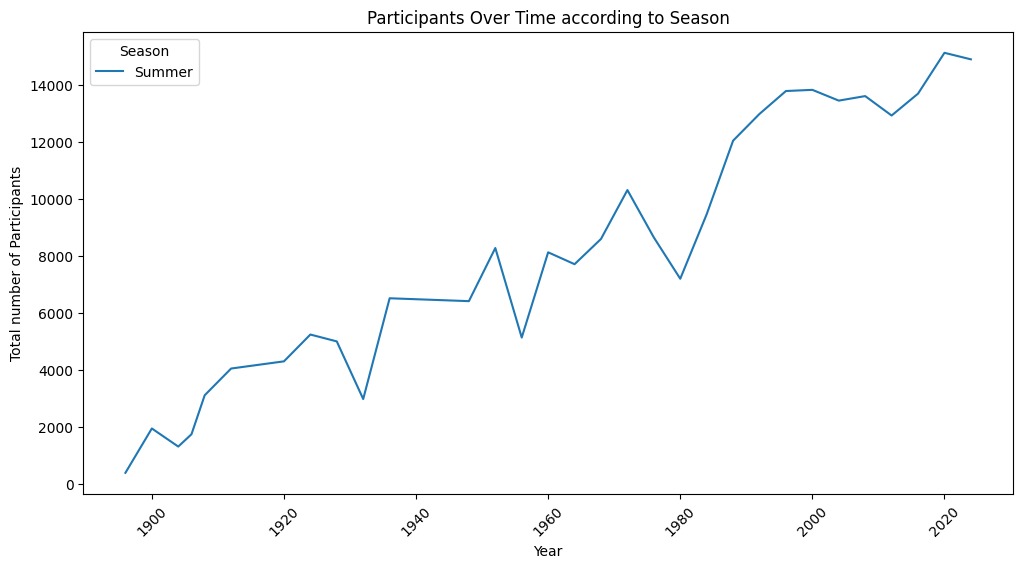

In [22]:
participants_by_season = df.groupby(['Year', 'Season']).size().reset_index(name='Participants')

plt.figure(figsize=(12, 6))
sns.lineplot(data=participants_by_season, x='Year', y='Participants', hue='Season')
plt.title('Participants Over Time according to Season')
plt.ylabel('Total number of Participants')
plt.xticks(rotation=45)
plt.show()


## Top 10 sports which has contributed to win more models

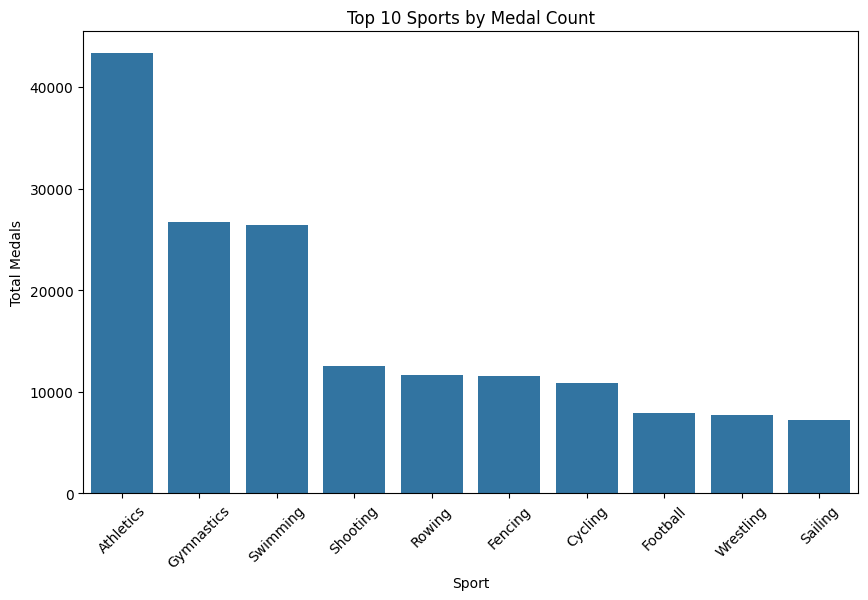

In [23]:
medals_by_sport = df[df['Medal'] != 'NA'].groupby('Sport')['Medal'].count().reset_index(name='Total Medals')
top_sports = medals_by_sport.sort_values('Total Medals', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sports, x='Sport', y='Total Medals')
plt.title('Top 10 Sports by Medal Count')
plt.xticks(rotation=45)
plt.show()
